In [1]:
import numpy as np
import scipy as sp
from scipy import optimize,special,integrate
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.colors as colors
from lanczos_bin import *

from IPython.display import clear_output
%load_ext autoreload
%autoreload 2

In [2]:
N_color = 256
vals = np.ones((N_color, 4))
vals[::-1, 0] = np.linspace(7/256, 1, N_color)
vals[::-1, 1] = np.linspace(54/256, 1, N_color)
vals[::-1, 2] = np.linspace(66/256, 1, N_color)
base02_cmap = colors.ListedColormap(vals)

In [3]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [4]:
N  = 200
X = np.linspace(-2,6, N)
Y = np.linspace(-3, 3, N)

In [5]:
R1 = np.zeros((N,N),dtype=np.double)

theta = np.array([.5,.8,1.2,1.5,3])

w = 0
lmin = 1/2
lmax = 3
for i,x in enumerate(X):
    for j,y in enumerate(Y):
        R1[i,j] = Q_wz(w,x+1j*y,lmin,lmax)/np.abs(np.prod(w-theta)/np.prod((x+1j*y)-theta))**(1/len(theta))

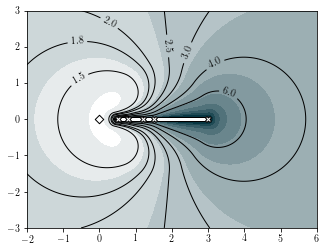

In [6]:
w = 0
fig,ax = plt.subplots(figsize=(6,4))

CS = plt.contour(X,Y,R1.T,[1.5,1.8,2,2.5,3,4,6],colors='k',linewidths=1)
        
CS.levels = [str(val) for val in CS.levels]

ax.clabel(CS, CS.levels, inline=True,fontsize=10,manual=[[-.5,1],[-.6,2],[.2,2.5],[1.7,2],[2.5,1.8],[3.2,1.5],[3.5,.5]])

plt.plot([lmin,lmax],[0,0],linewidth='5',color='k',solid_capstyle='round')
plt.plot([lmin,lmax],[0,0],linewidth='3',color='w',solid_capstyle='round')
plt.scatter(w,0,marker='D',color='k',facecolors='w',zorder=10)
plt.scatter(theta,0*theta,marker='X',color='k',facecolors='w',zorder=10)

plt.contourf(X,Y,R1.T,levels=np.hstack([np.logspace(np.log10(1e-2/2),np.log10(100),30)]),cmap=base02_cmap,norm=colors.LogNorm(vmin=1, vmax=30))

ax.set_aspect('equal')
plt.savefig('imgs/slack_ratio_theta_out.pdf',bbox_inches='tight')

In [7]:
R2 = np.zeros((N,N),dtype=np.double)

theta = np.array([.5,.8,1.2,1.5,3])
w = 1
lmin = 1/2
lmax = 3

for i,x in enumerate(X):
    for j,y in enumerate(Y):
        R2[i,j] = Q_wz(w,x+1j*y,lmin,lmax)/np.abs(np.prod(w-theta)/np.prod((x+1j*y)-theta))**(1/len(theta))

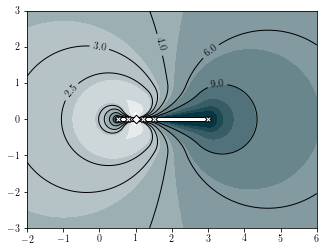

In [8]:
w = 1

fig,ax = plt.subplots(figsize=(6,4))

CS = plt.contour(X,Y,R2.T,[2.5,3,4,6,9],colors='k',linewidths=1)
        
CS.levels = [str(val) for val in CS.levels]

ax.clabel(CS, CS.levels, inline=True,fontsize=10,manual=[[-1,1],[0,2],[1.5,2],[3,2],[3.25,1]])

plt.plot([lmin,lmax],[0,0],linewidth='5',color='k',solid_capstyle='round')
plt.plot([lmin,lmax],[0,0],linewidth='3',color='w',solid_capstyle='round')
plt.scatter(w,0,marker='D',color='k',facecolors='w',zorder=10)
plt.scatter(theta,0*theta,marker='X',color='k',facecolors='w',zorder=10)

plt.contourf(X,Y,R2.T,levels=np.hstack([np.logspace(np.log10(1e-2/2),np.log10(100),30)]),cmap=base02_cmap,norm=colors.LogNorm(vmin=1, vmax=30))


ax.set_aspect('equal')
plt.savefig('imgs/slack_ratio_theta_in.pdf',bbox_inches='tight')